# Exemplo básico de SVM

Contribuição de Marcelo Alves apoiado pelo ChatGPT.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Carregamento de Dados

In [2]:
# Carregar o conjunto de dados
df = pd.read_csv("dados_regressao.csv")

# Separar variáveis independentes (X) e dependentes (Y)
X = df[['X']].values
Y = df['Y'].values

# Treinamento e Avaliação

In [3]:
# Padronizar os dados para melhor desempenho do SVM
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1)).ravel()

# Criar o modelo SVM para regressão
modelo = SVR(kernel='rbf', C=100, epsilon=0.1)
modelo.fit(X_scaled, Y_scaled)

# Fazer previsões
y_pred_scaled = modelo.predict(X_scaled)
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Avaliação do modelo
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f"Erro quadrático médio: {mse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")

Erro quadrático médio: 3.72
Coeficiente de determinação (R²): 0.94


# Predição

In [14]:
novo_valor = 4
novo_valor_scaled = scaler_X.transform(np.array([[novo_valor]]))
previsto = modelo.predict(novo_valor_scaled)

# Converte a predição para a escala original
y_novo = scaler_Y.inverse_transform(previsto.reshape(-1, 1))

print(f"Previsão para X = {novo_valor}: {y_novo[0, 0]:.2f}")

Previsão para X = 4: 18.39


# Exibição de dados e reta

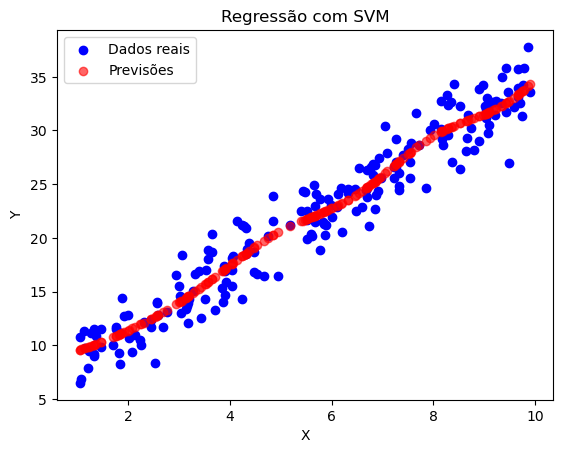

In [5]:
# Plotar os dados e a curva de regressão
plt.scatter(X, Y, color='blue', label='Dados reais')
plt.scatter(X, y_pred, color='red', label='Previsões', alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Regressão com SVM")
plt.show()
